# **<div align="center">EDP : TP1</div>**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### **1. Construction et visualisation du maillage et de la condition initiale**

In [2]:
# Constantes

L = 1       # L = 1m
m = 50      # m = 50
x0 = 0.5    # x0 = 0.5m
#u0 = np

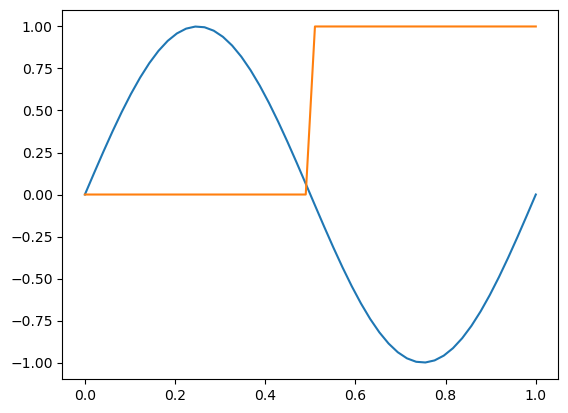

In [3]:
abscisse = np.linspace(0,L,m)

def CI1(beta,L,x):
    return np.sin((2*beta*np.pi*x)/L)

def CI2(x,x0):
    return x > x0

betatest = 1 # valeur de beta utilisée pour le deuxième point du 2.2
u01 = np.vectorize(CI1)(betatest,L,abscisse)

u02 = np.vectorize(CI2)(abscisse,x0)

plt.plot(abscisse,u01)
plt.plot(abscisse,u02)

### **2. Etude du comportement de schémas différences finies**

#### **2.1. Paramètres physiques et numériques**

In [4]:
# Constantes

a = 1       # a = 1m/s
C = 0.5     # C "rond", a*dt/dx

#### **2.2. Méthodologie**

Ici lire 2.2 du sujet

In [5]:
T = 1
deltax = L/m
deltaT = C*deltax/a
p = int(T/deltaT)

temps = np.linspace(0,T,p)

# Constantes point 1
liste_beta = [2**i for i in range(1,5)]                         # crée [2,4,8,16] (point 1)

# Constantes point 2
betapoint2 = 1
liste_C = [0.1, 0.2, 0.4, 0.8, 1, 1.5]                          # point 2, beta = 1 est implémenté plus haut dans la variable beta

# Constantes point 3
Cpoint3 = 1
indTviz = [int(np.floor(p/2**i)) for i in range(3,-1,-1)]       # indices pour lesquels on va visualiser les solutions pour le point 3

# Constantes point 4 (déjà implémentées)

# Constantes point 5 (nécessitera donc une rédéfinition des abscisses)
liste_m = [4, 10, 20, 50, 100, 200]

# Constantes point 6
moins_a = -a

In [6]:
indTviz

[12, 25, 50, 100]

#### **2.3. Schémas numériques à implémenter**

Ici lire 2.3 du sujet

### **3. Implémentation des schémas**

#### **3.1. Schéma FOU-EE**

In [7]:
def FOUEE_u_i_nplus1(rien, u_i_n, u_imoinsun_n, C) :
    return u_i_n - C*(u_i_n - u_imoinsun_n)

##### **3.1.3 Pour CI2**

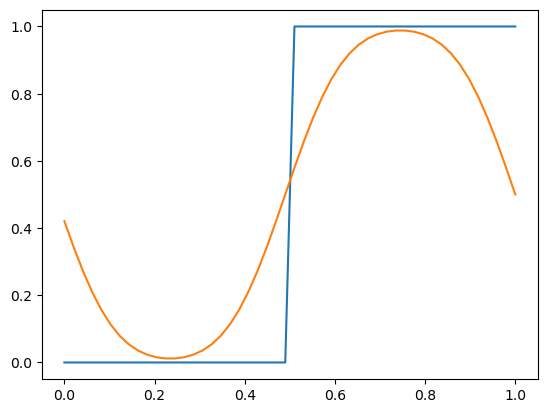

In [8]:
grille_temps_espace = np.zeros((m,p))
grille_temps_espace[:,0] = u02
for n in range(1,p) :
    for i in range(m) :
        grille_temps_espace[i,n] = FOUEE_u_i_nplus1(None, grille_temps_espace[i,n - 1], grille_temps_espace[i - 1,n - 1], C)

# On doit encore visualiser nos solution à différents temps (indTviz)

plt.plot(abscisse, grille_temps_espace[:,0])

plt.plot(abscisse, grille_temps_espace[:,-1])

#### **3.2. Schéma FOF-EE**

In [9]:
def FOFEE_u_i_nplus1(u_iplusun_n, u_i_n, rien, C) :
    return u_i_n - C*(u_iplusun_n - u_i_n)

##### **3.2.3 Pour CI2**

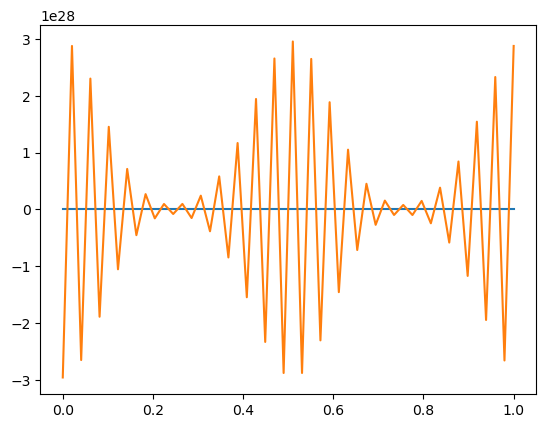

In [10]:
grille_temps_espace = np.zeros((m,p))
grille_temps_espace[:,0] = u02
for n in range(1,p) :
    for i in range(m) :
        grille_temps_espace[i,n] = FOFEE_u_i_nplus1(grille_temps_espace[(i + 1)%m,n - 1], grille_temps_espace[i,n - 1], None, C)

# On doit encore visualiser nos solution à différents temps (indTviz)

plt.plot(abscisse, grille_temps_espace[:,0])

plt.plot(abscisse, grille_temps_espace[:,-1])

#### **3.3. Schéma SOC-EE**

In [12]:
def SOCEE_u_i_nplus1(u_iplusun_n, u_i_n, u_imoinsun_n, C) :
    return u_i_n - (C/2)*(u_iplusun_n - u_imoinsun_n)

##### **3.3.3 Pour CI2**

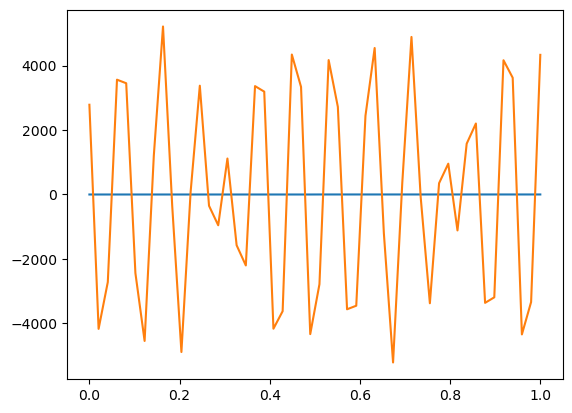

In [13]:
grille_temps_espace = np.zeros((m,p))
grille_temps_espace[:,0] = u02
for n in range(1,p) :
    for i in range(m) :
        grille_temps_espace[i,n] = SOCEE_u_i_nplus1(grille_temps_espace[(i + 1)%m,n - 1], grille_temps_espace[i,n - 1], grille_temps_espace[i - 1,n - 1], C)

# On doit encore visualiser nos solution à différents temps (indTviz)

plt.plot(abscisse, grille_temps_espace[:,0])

plt.plot(abscisse, grille_temps_espace[:,-1])

#### **3.4. Schéma de Lax-Wendroff**

In [14]:
def LaxWendroff_u_i_nplus1(u_iplusun_n, u_i_n, u_imoinsun_n, C) :
    return u_i_n - (C/2)*(u_iplusun_n - u_imoinsun_n) + (C**2/2)*(u_iplusun_n - 2*u_i_n + u_imoinsun_n)

##### **3.4.3 Pour CI2**

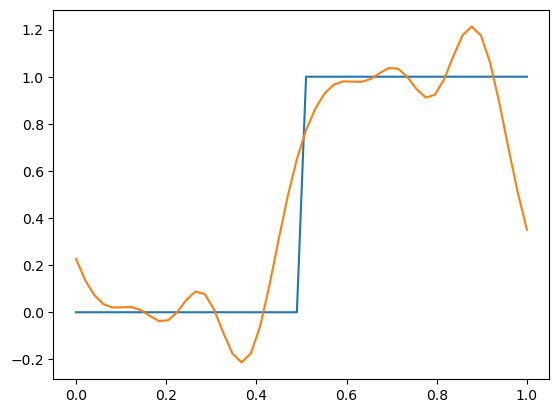

In [57]:
grille_temps_espace = np.zeros((m,p))
grille_temps_espace[:,0] = u02
for n in range(1,p) :
    for i in range(m) :
        grille_temps_espace[i,n] = LaxWendroff_u_i_nplus1(grille_temps_espace[(i + 1)%m,n - 1], grille_temps_espace[i,n - 1], grille_temps_espace[i - 1,n - 1], C)

# On doit encore visualiser nos solution à différents temps (indTviz)

plt.plot(abscisse, grille_temps_espace[:,0])

plt.plot(abscisse, grille_temps_espace[:,-1])

### **X. Annexes partie 2.2 - sorties des schémas**

##### **X.1. Fonction de calcul de la grille temps-espace pour chaque condition initiale**

In [50]:
def grille(m, p, u0, schema, C) :
    grille_retour = np.zeros((m,p))
    grille_retour[:,0] = u0
    for n in range(1,p) :
        for i in range(m) :
            grille_retour[i,n] = schema(grille_retour[(i + 1)%m,n - 1], grille_retour[i,n - 1], grille_retour[i - 1,n - 1], C)
    return grille_retour



 Solutions obtenues avec différents beta pour la condition CI1
TODO : commentaires sur les figures pour le point 1 avec le schéma FOU-EE

 Solutions obtenues avec différents C pour la condition CI1
TODO : commentaires sur les figures pour le point 2 avec le schéma FOU-EE

 Solutions obtenues pour C = 1 pour la condition CI2
TODO : commentaires sur les figures pour le point 3 avec le schéma FOU-EE

 Solutions obtenues avec différents C pour la condition CI2
TODO : commentaires sur les figures pour le point 4 avec le schéma FOU-EE

 Solutions obtenues avec différents m pour la condition CI2
TODO : commentaires sur les figures pour le point 5 avec le schéma FOU-EE

 Solutions obtenues avec différents beta pour la condition CI1
TODO : commentaires sur les figures pour le point 1 avec le schéma FOF-EE

 Solutions obtenues avec différents C pour la condition CI1
TODO : commentaires sur les figures pour le point 2 avec le schéma FOF-EE

 Solutions obtenues pour C = 1 pour la condition CI2
TO

/tmp/ipykernel_10520/771572311.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 4))


TODO : commentaires sur les figures pour le point 4 avec le schéma de Lax-Wendroff

 Solutions obtenues avec différents m pour la condition CI2
TODO : commentaires sur les figures pour le point 5 avec le schéma de Lax-Wendroff


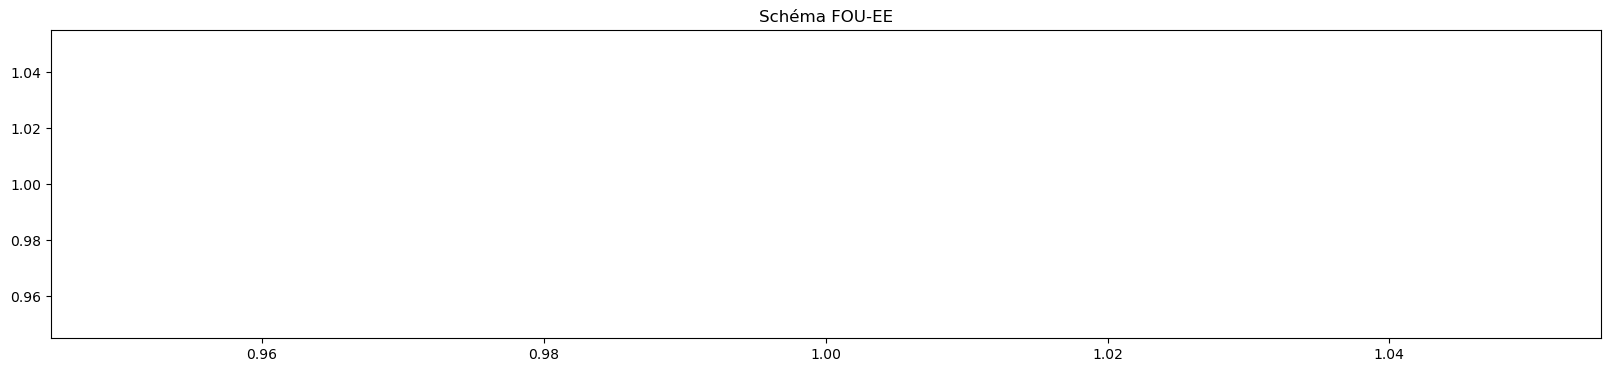

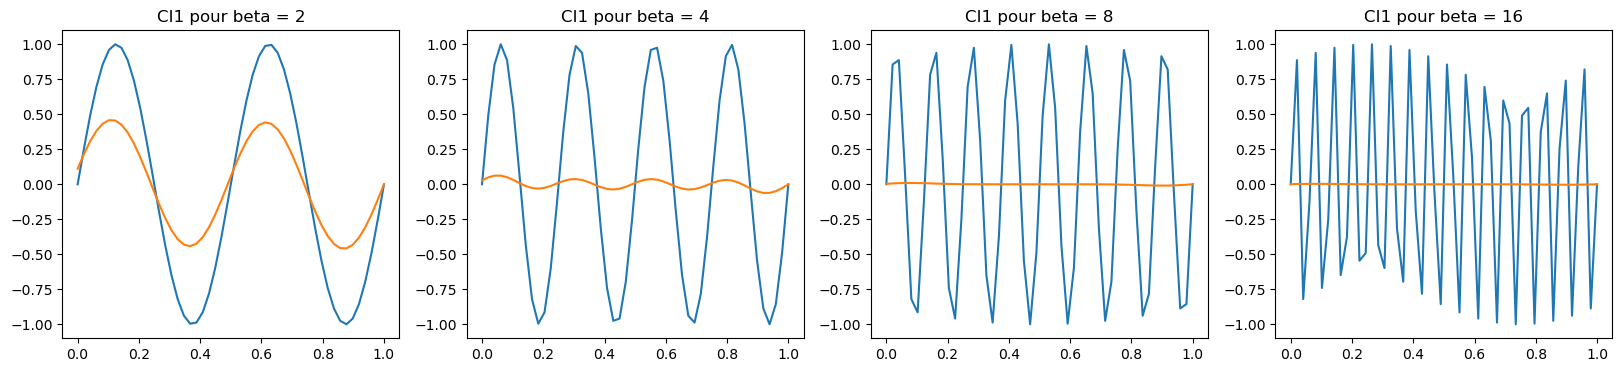

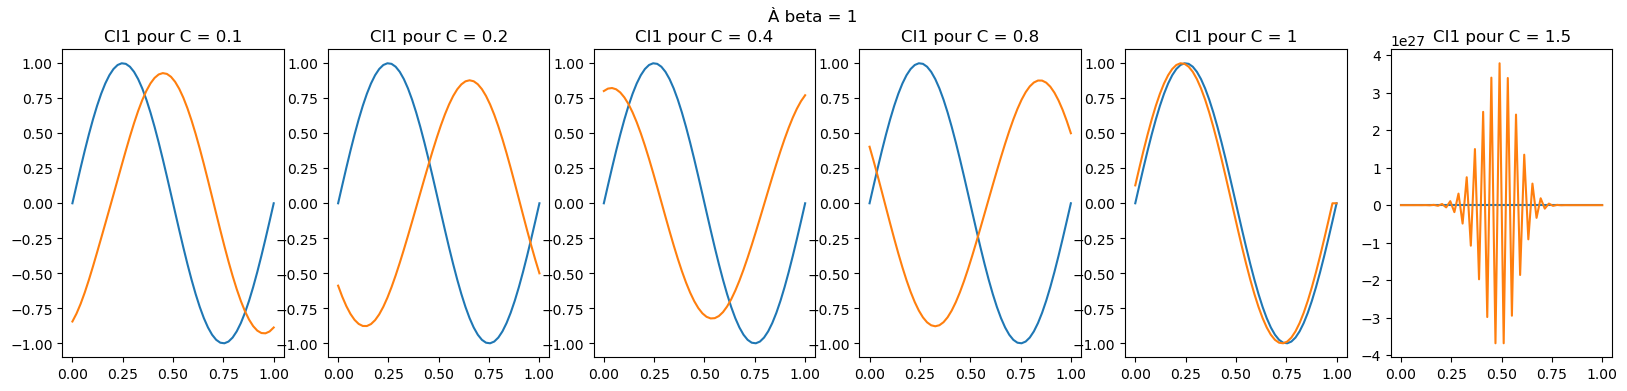

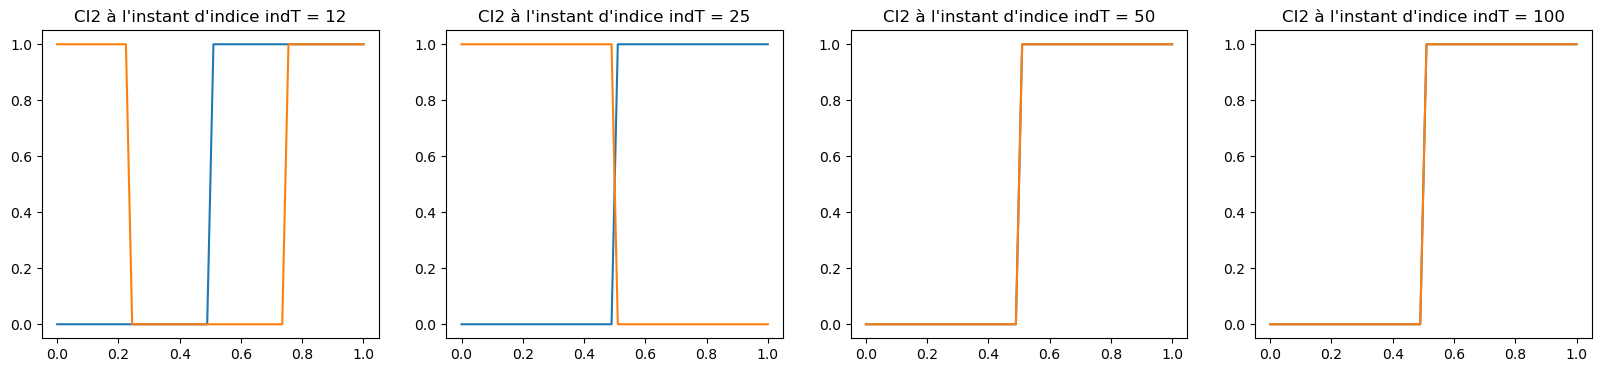

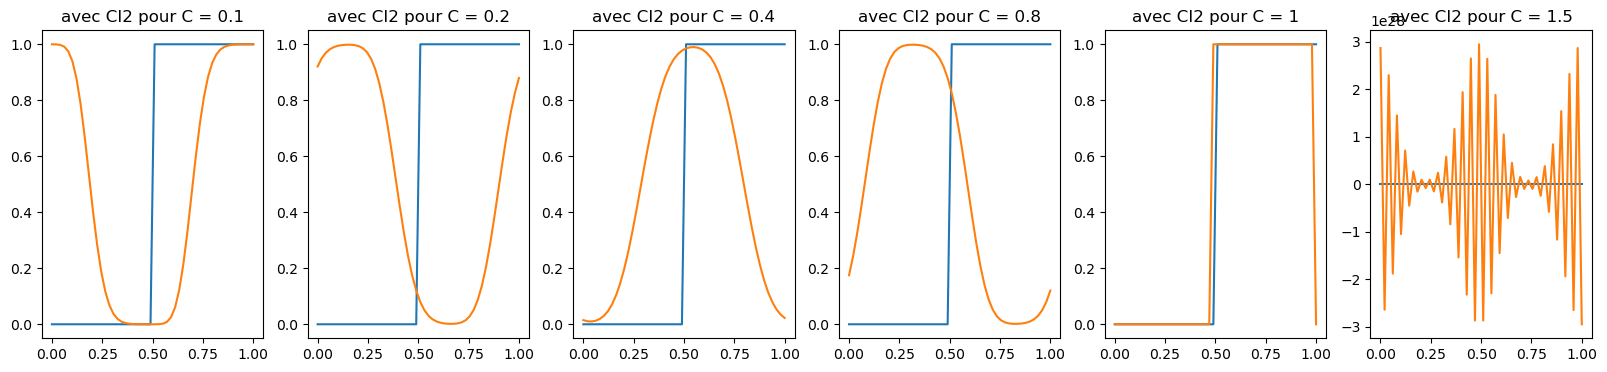

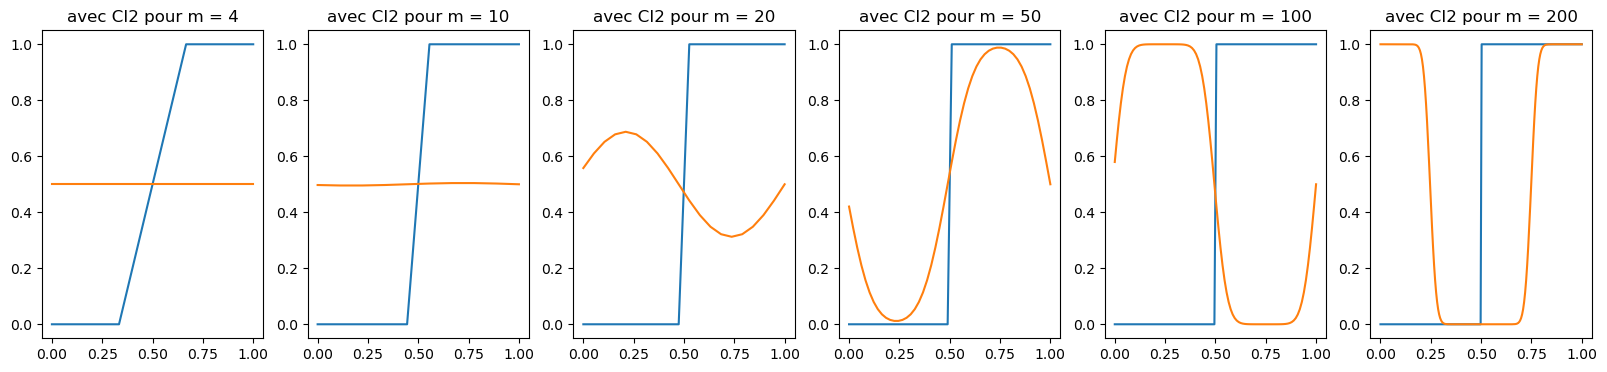

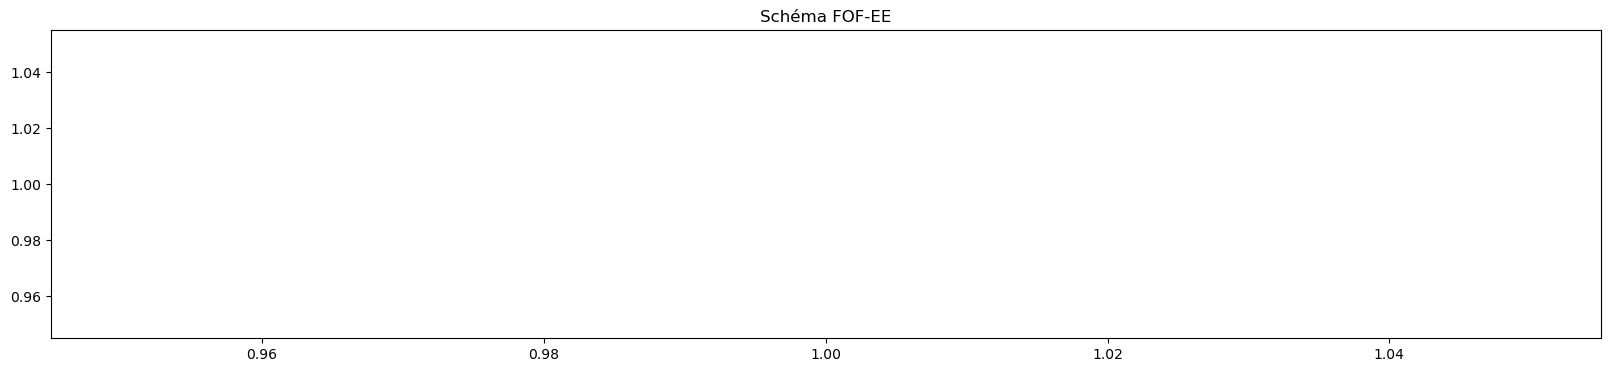

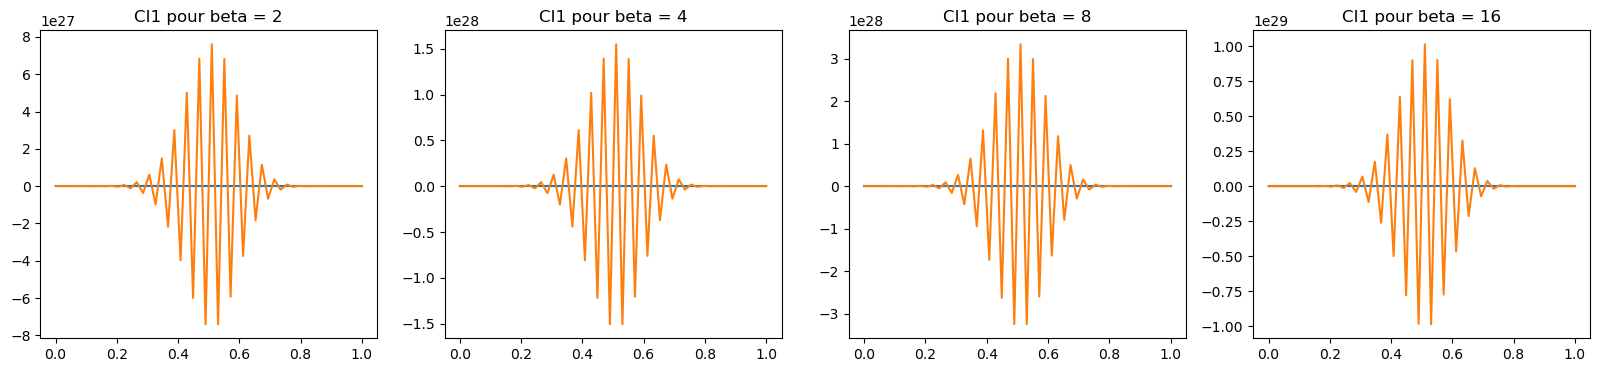

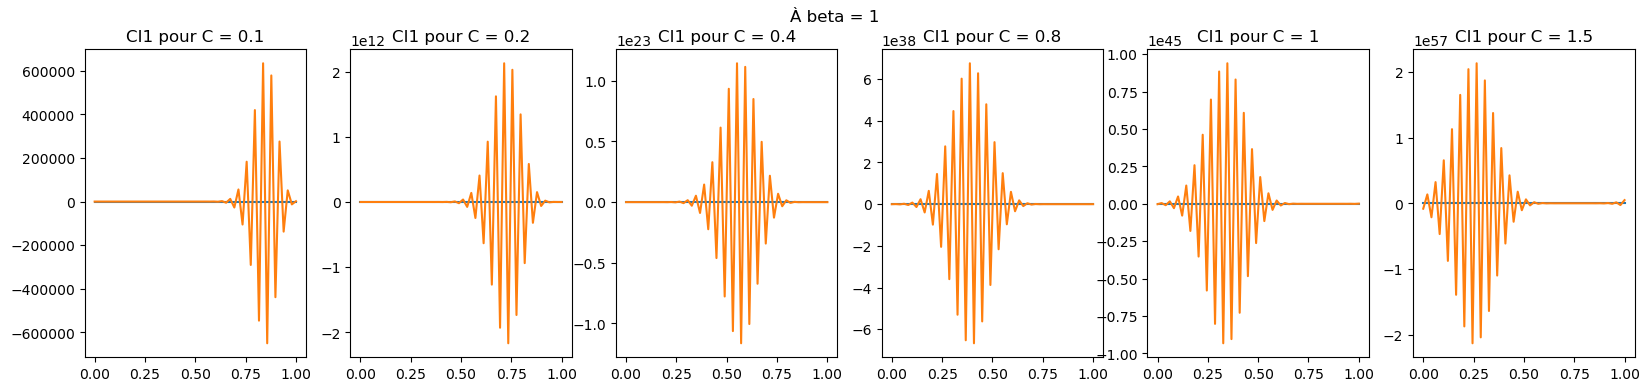

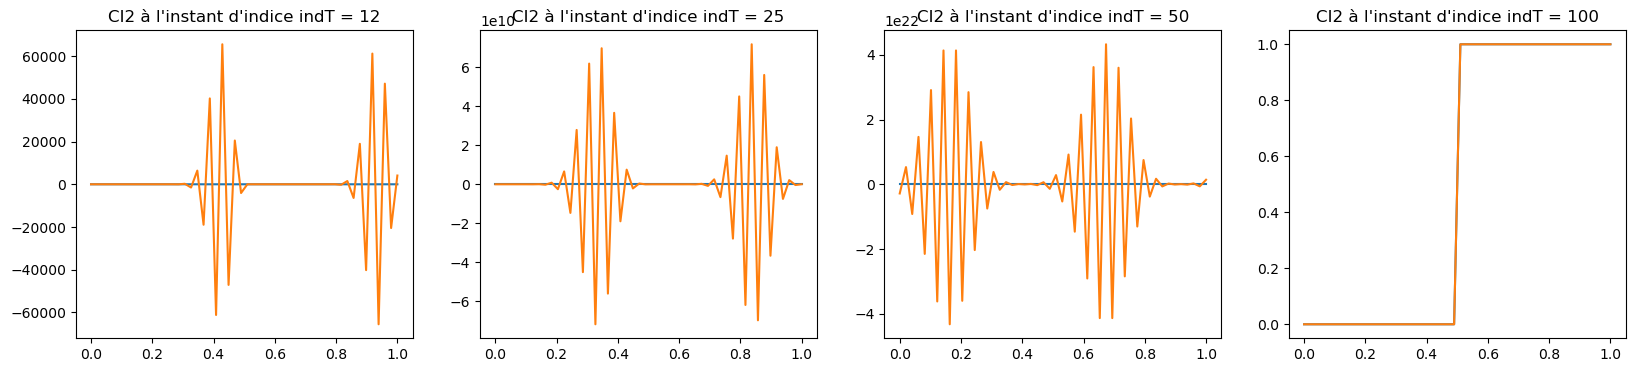

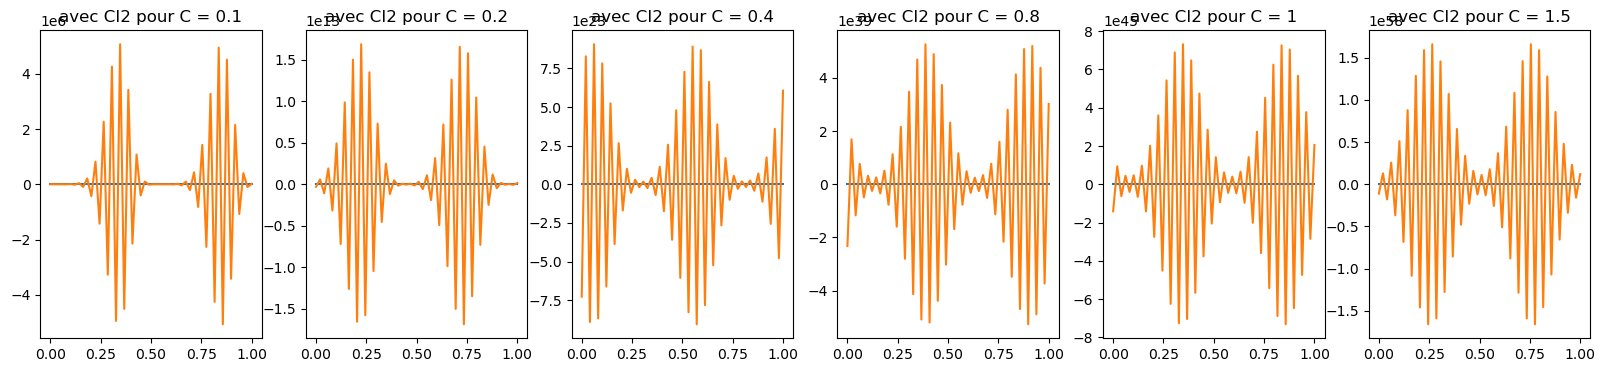

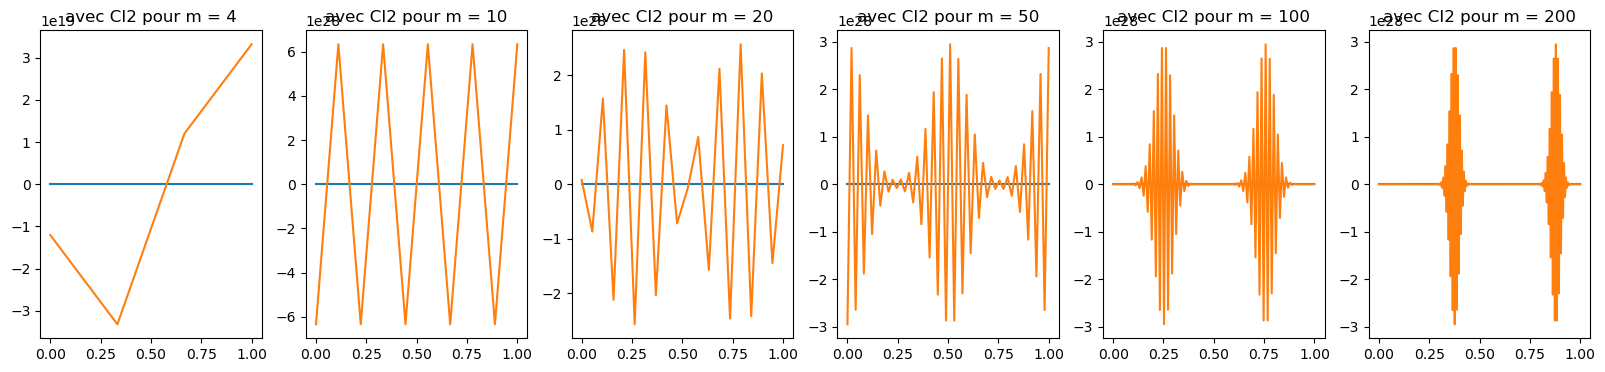

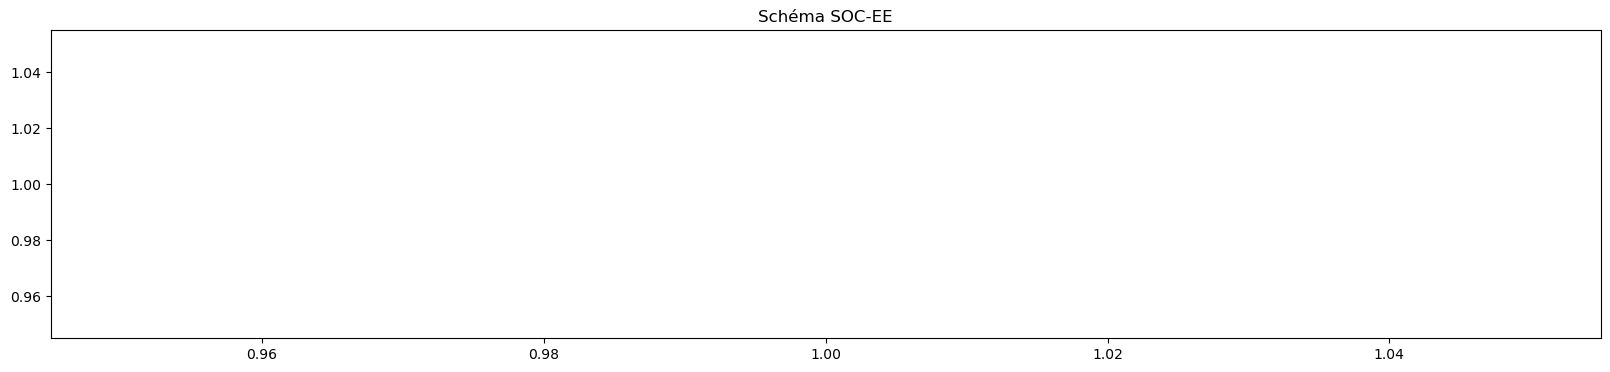

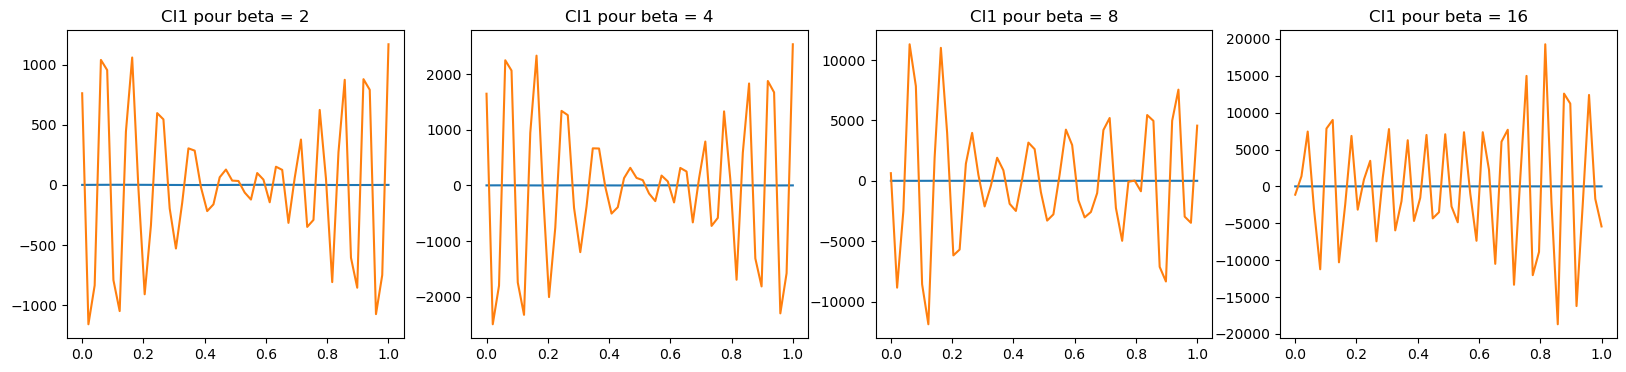

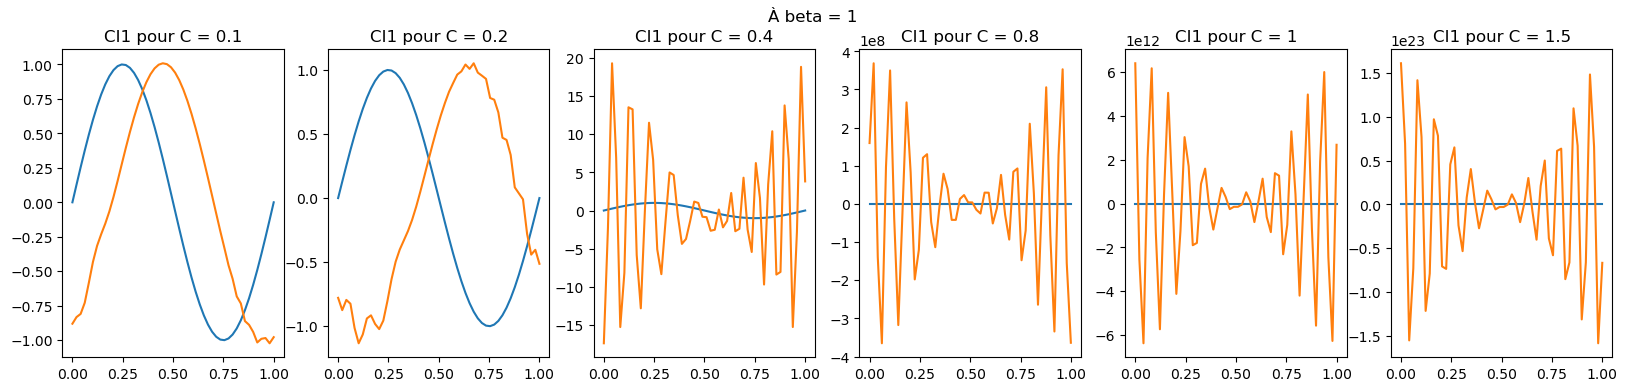

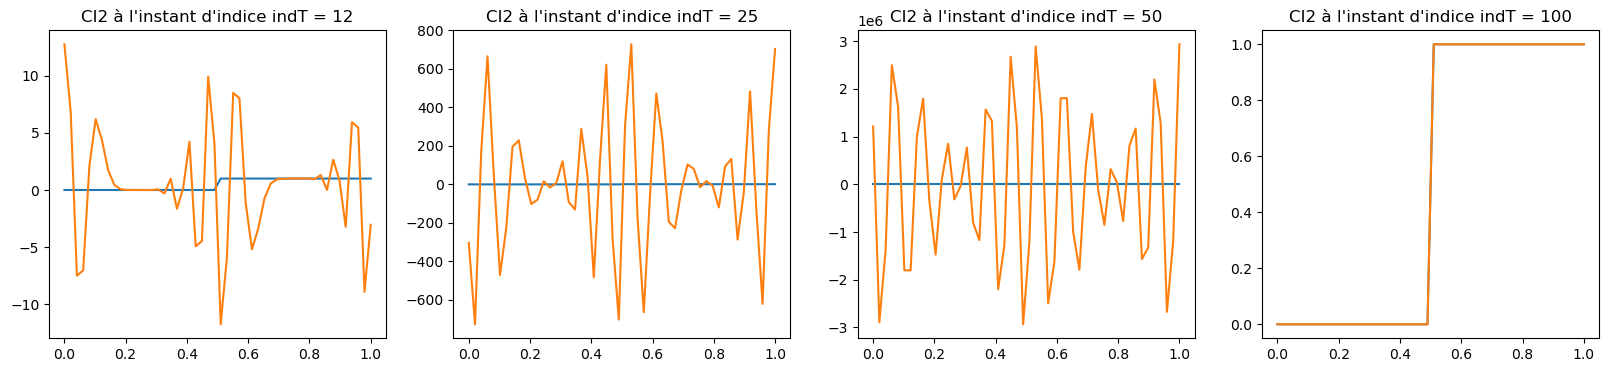

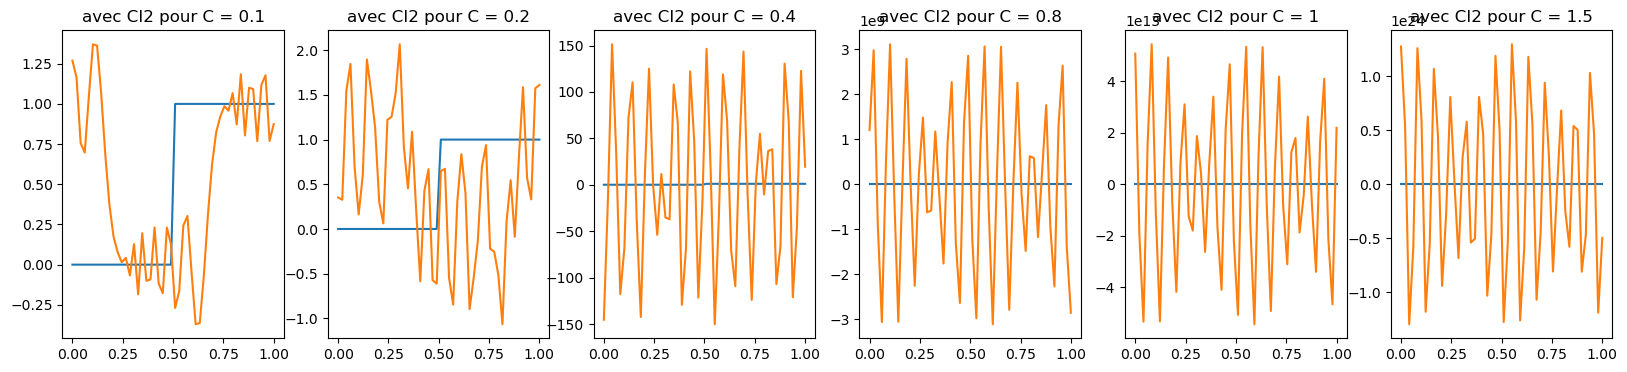

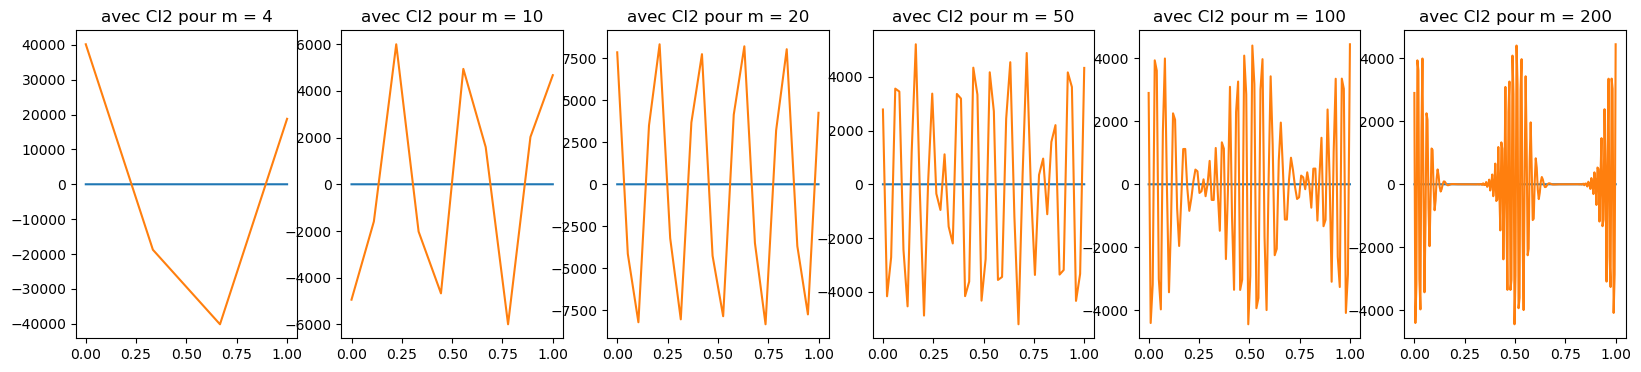

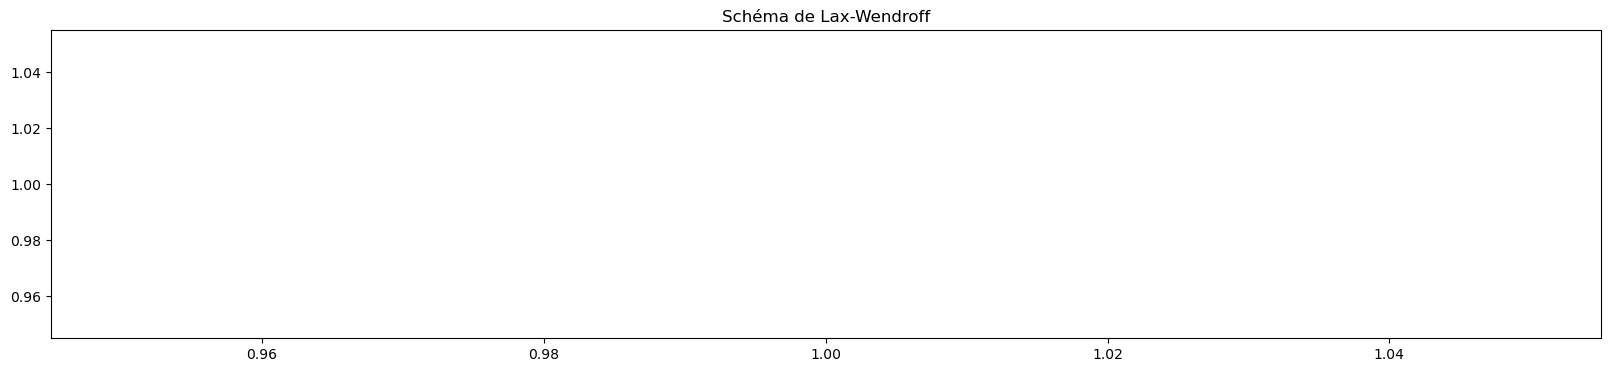

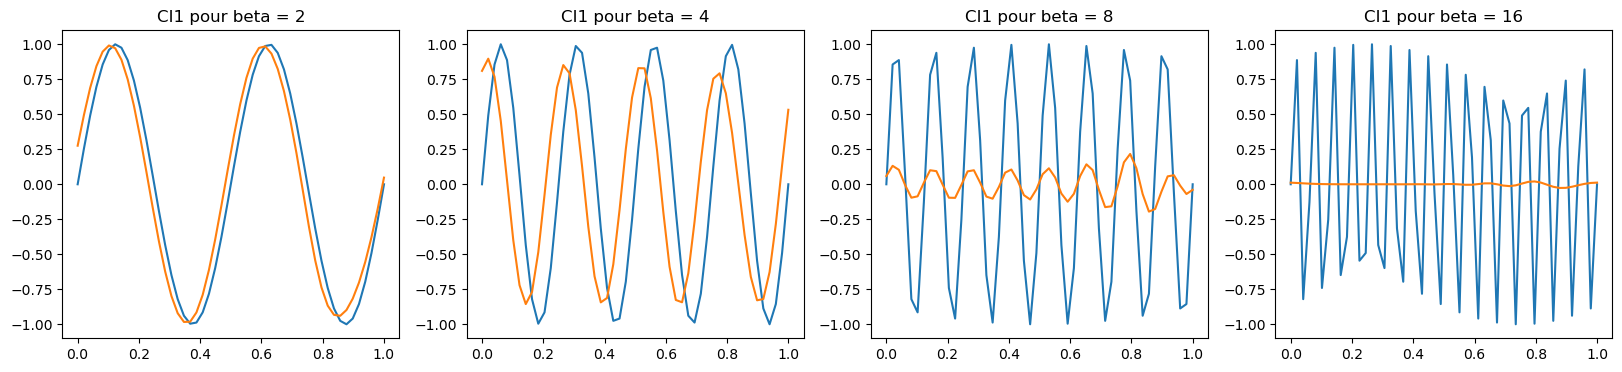

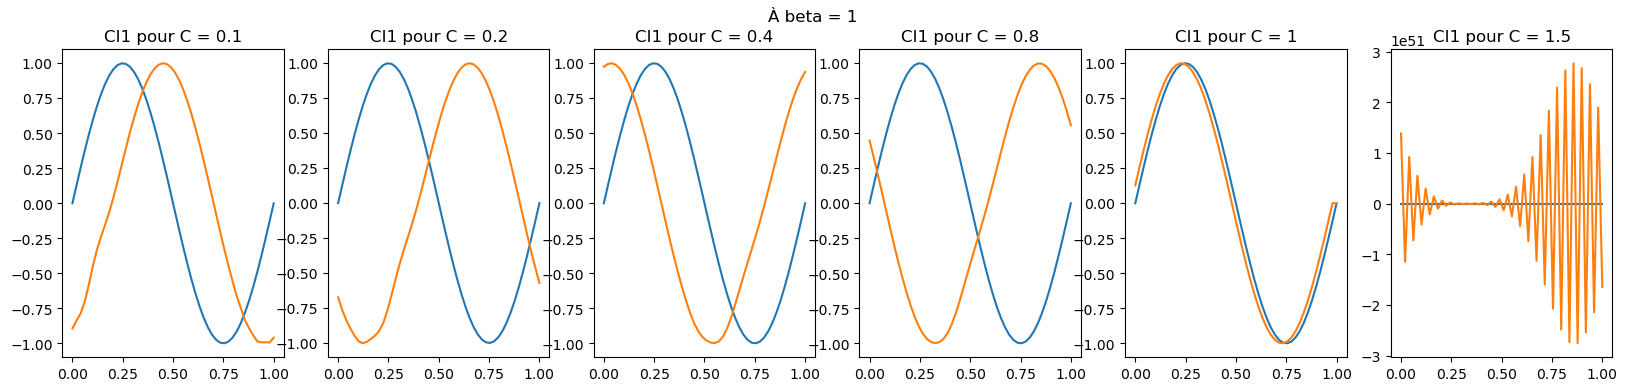

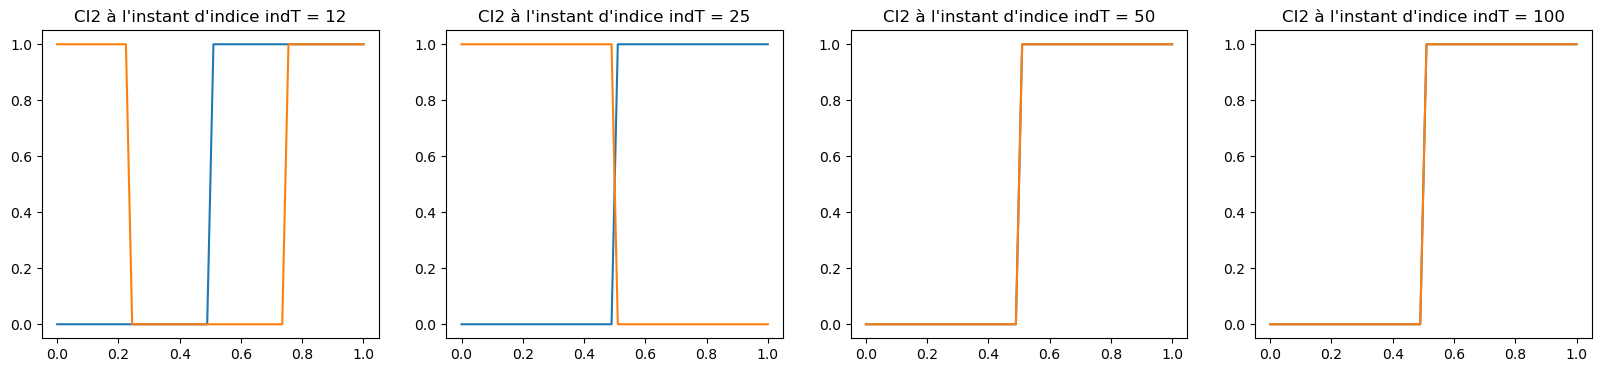

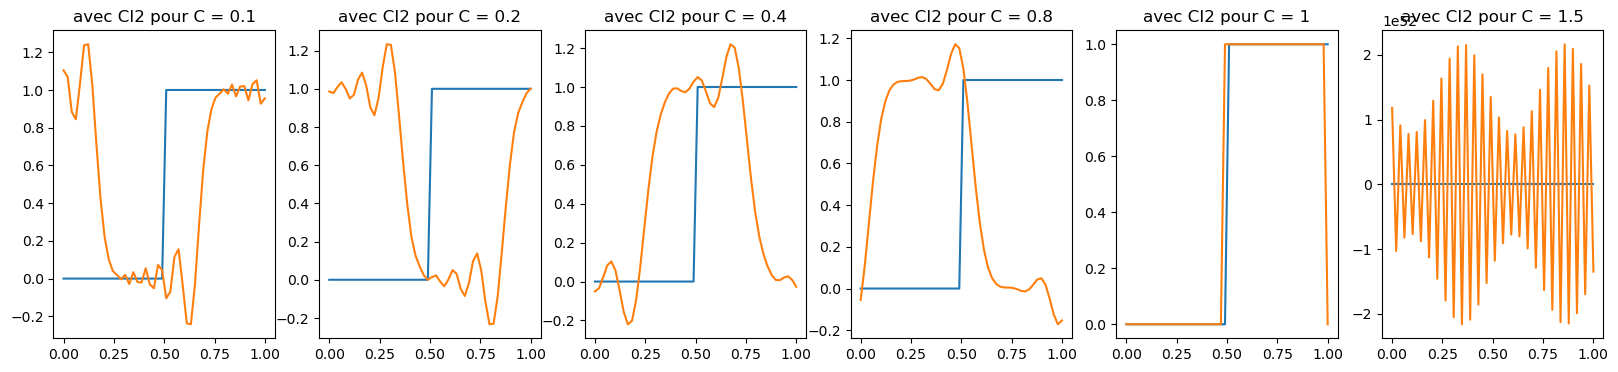

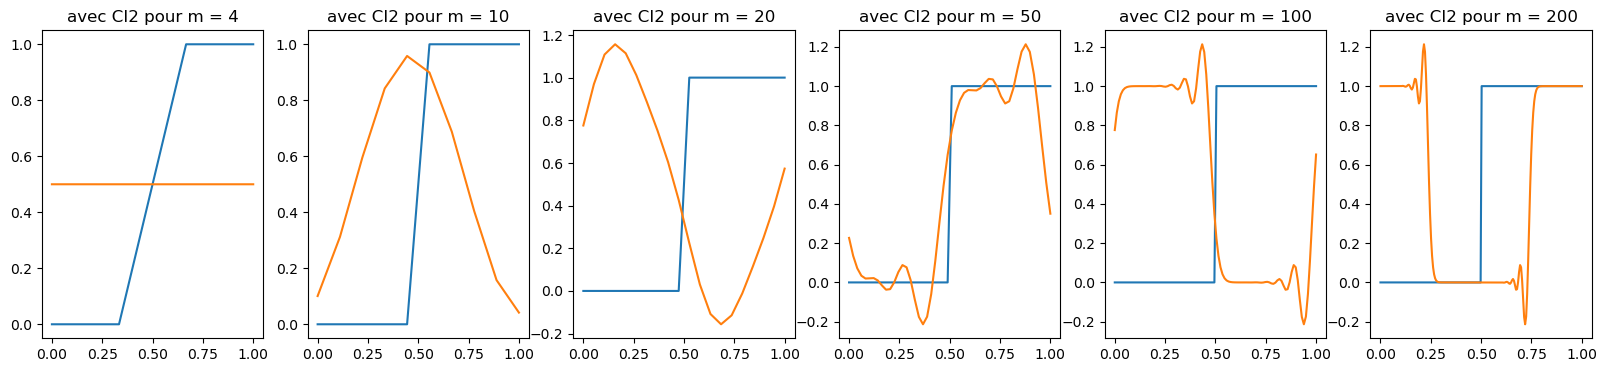

In [79]:
liste_schemas = [FOUEE_u_i_nplus1, FOFEE_u_i_nplus1, SOCEE_u_i_nplus1, LaxWendroff_u_i_nplus1]
liste_nom_schemas = ["FOU-EE", "FOF-EE", "SOC-EE", "de Lax-Wendroff"]

indschema = 0
for schema in liste_schemas :

    plt.figure(figsize=(20, 4))
    plt.plot(1,1)
    plt.title ("Schéma " + liste_nom_schemas[indschema])



    # Point 1
    plt.figure(figsize=(20, 4))
    print("\n Solutions obtenues avec différents beta pour la condition CI1")
    indbeta = 1
    for betapoint1 in liste_beta :
        u0point1 = np.vectorize(CI1)(betapoint1, L, abscisse)
        grillepoint1 = grille(m, p, u0point1, schema, C)
        # TODO : implémenter le code pour la visualisation, pour l'instant les deux lignes ci-dessous
        plt.subplot(1,4,indbeta)
        plt.plot(abscisse, grillepoint1[:,0])
        plt.plot(abscisse, grillepoint1[:,-1])
        plt.title("CI1 pour beta = " + str(betapoint1))
        indbeta += 1
    print("TODO : commentaires sur les figures pour le point 1 avec le schéma " + liste_nom_schemas[indschema])


    
    # Point 2
    plt.figure(figsize=(20, 4))
    print("\n Solutions obtenues avec différents C pour la condition CI1")
    u0point2 = np.vectorize(CI1)(betapoint2, L, abscisse)
    indC = 1
    for Cpoint2 in liste_C :
        grillepoint2 = grille(m, p, u0point2, schema, Cpoint2)
        # TODO : implémenter le code pour la visualisation, pour l'instant les deux lignes ci-dessous
        plt.subplot(1,len(liste_C),indC)
        plt.plot(abscisse, grillepoint2[:,0])
        plt.plot(abscisse, grillepoint2[:,-1])
        plt.title("CI1 pour C = " + str(Cpoint2))
        plt.suptitle("À beta = 1")
        indC += 1
    print("TODO : commentaires sur les figures pour le point 2 avec le schéma " + liste_nom_schemas[indschema])


    # Point 3
    plt.figure(figsize=(20, 4))
    plt.title("Point 3")
    print("\n Solutions obtenues pour C = 1 pour la condition CI2")
    u0point3 = np.vectorize(CI2)(abscisse, x0)
    grillepoint3 = grille(m, p, u0point3, schema, Cpoint3)
    # TODOFAIT : implémenter le code pour la visualisation, pour l'instant les deux lignes ci-dessous
    indindT = 1
    for indT in indTviz :
        plt.subplot(1,len(indTviz),indindT)
        plt.plot(abscisse, grillepoint3[:,0])
        plt.plot(abscisse, grillepoint3[:,indT%p])
        plt.title("CI2 à l'instant d'indice indT = " + str(indT))
        indindT += 1
    print("TODO : commentaires sur les figures pour le point 3 avec le schéma " + liste_nom_schemas[indschema])



    # Point 4
    plt.figure(figsize=(20, 4))
    print("\n Solutions obtenues avec différents C pour la condition CI2")
    u0point4 = np.vectorize(CI2)(abscisse, x0)
    indC = 1
    for Cpoint2 in liste_C :
        grillepoint4 = grille(m, p, u0point4, schema, Cpoint2)
        # TODO : implémenter le code pour la visualisation, pour l'instant les deux lignes ci-dessous
        plt.subplot(1,len(liste_C),indC)
        plt.plot(abscisse, grillepoint4[:,0])
        plt.plot(abscisse, grillepoint4[:,-1])
        plt.title("avec CI2 pour C = " + str(Cpoint2))
        indC += 1
    print("TODO : commentaires sur les figures pour le point 4 avec le schéma " + liste_nom_schemas[indschema])



    # Point 5
    plt.figure(figsize=(20, 4))
    print("\n Solutions obtenues avec différents m pour la condition CI2")
    indm = 1
    for mpoint5 in liste_m :
        abscissepoint5 = np.linspace(0,L,mpoint5)
        u0point5 = np.vectorize(CI2)(abscissepoint5, x0)
        grillepoint5 = grille(mpoint5, p, u0point5, schema, C)
        # TODO : implémenter le code pour la visualisation, pour l'instant les deux lignes ci-dessous
        plt.subplot(1,len(liste_m),indm)
        plt.plot(abscissepoint5, grillepoint5[:,0])
        plt.plot(abscissepoint5, grillepoint5[:,-1])
        plt.title("avec CI2 pour m = " + str(mpoint5))
        indm += 1
    print("TODO : commentaires sur les figures pour le point 5 avec le schéma " + liste_nom_schemas[indschema])

    

    indschema += 1